## how many times do we have to roll the die to make a fractal?
experiment with different number of turns 
Maybe they could help construct the roll_die() function? 

Make plot bigger 


http://bopace.github.io/python/2016/06/09/python-turtle-sierpinski/

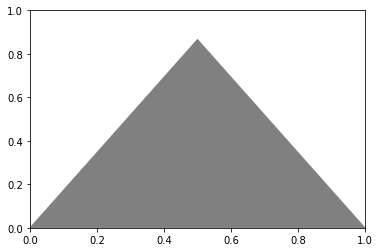

In [30]:
import numpy as np 
import matplotlib.pyplot as plt

def draw_triangle(): 
    # our equilateral triangle vertices
    vertex_a = [0,0]
    vertex_b = [1,0]
    vertex_c = [.5,np.sqrt(3)/2]

    X = np.array([vertex_a, vertex_b, vertex_c])

    plt.figure()

    #plt.scatter(X[:, 0], X[:, 1], s = 170, color = Y[:])

    triangle = plt.Polygon(X[:3,:], color='grey')
    plt.gca().add_patch(triangle)

    plt.show()
draw_triangle()    

6
5


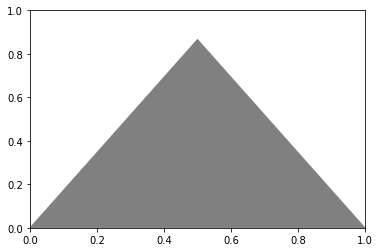

In [31]:
#returns ranom int to represent die roll (1-6)
def roll_die():
    roll = randint(1,7)
    return roll

print (roll_die())
print (roll_die())

draw_triangle()

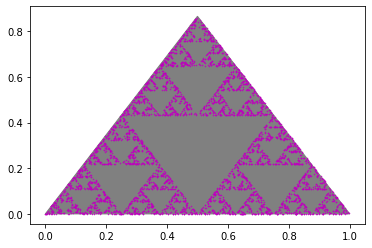

In [34]:
import numpy as np
import pylab
from random import randint

#returns the x and y coordinates of the midpoint of two points  
def midpoint(point1, point2):
    return [(point1[0] + point2[0])/2, (point1[1] + point2[1])/2]


#initialze current point to 0, 0
current_point = [0,0]  

#set number of turns 
num_turns = 5000

# our equilateral triangle vertices
vertex_a = [0,0]
vertex_b = [1,0]
vertex_c = [.5,np.sqrt(3)/2]


X = np.array([vertex_a, vertex_b, vertex_c])

plt.figure()

triangle = plt.Polygon(X[:3,:], color='grey')
plt.gca().add_patch(triangle)

#plt.show()

pylab.plot(vertex_a[0],vertex_b[1],'m.',markersize=1)

#returns ranom int to represent die roll (1-6)
def roll_die():
    roll = randint(1,7)
    return roll

#Mark current point 
for turn in range(num_turns):
    current_roll = roll_die()    
    if current_roll == 1 or current_roll == 2:
        current_point = midpoint(current_point, vertex_a)
    elif current_roll == 3 or current_roll == 4:
        current_point = midpoint(current_point, vertex_b)
    elif current_roll == 5 or current_roll == 6:
        current_point = midpoint(current_point, vertex_c)
    # plot the new current point
    pylab.plot(current_point[0],current_point[1],'m.',markersize=1)


pylab.show()

In [1]:
import turtle

# function to have the turtle draw a triangle, the basic unit of our fractal
def draw_triangle(vertices,color,my_turtle):
    my_turtle.fillcolor(color)
    my_turtle.up()
    my_turtle.goto(vertices[0][0],vertices[0][1])
    my_turtle.down()
    my_turtle.begin_fill()
    my_turtle.goto(vertices[1][0],vertices[1][1])
    my_turtle.goto(vertices[2][0],vertices[2][1])
    my_turtle.goto(vertices[0][0],vertices[0][1])
    my_turtle.end_fill()
    
# the same midpoint function we wrote for the chaos game
def midpoint(point1, point2):
    return [(point1[0] + point2[0])/2, (point1[1] + point2[1])/2]
    
# recursive function that draws the different "levels" of the fractal
def draw_fractal(vertices,level,my_turtle):
    # the different colors we'll use to draw the fractals
    # in RGB format
    colors = [(0,150,189),(4,150,116),(216,95,30),(193,33,57),(129,41,199),
                (102,205,135),(51,187,204)]
    draw_triangle(vertices,colors[level],my_turtle)
    # call function recursively to draw all levels of fractal
    if level > 0:
        # draw first segment of fractal
        # the vertices being passed in are the bottom corner of the first
        # section, the bottom corner of the second section, and the bottom
        # corner of the third secion.
        draw_fractal([vertices[0],
                      midpoint(vertices[0], vertices[1]),
                      midpoint(vertices[0], vertices[2])],
                      level - 1, my_turtle)
        draw_fractal([vertices[1],
                      midpoint(vertices[0], vertices[1]),
                      midpoint(vertices[1], vertices[2])],
                      level - 1, my_turtle)
        draw_fractal([vertices[2],
                      midpoint(vertices[2], vertices[1]),
                      midpoint(vertices[0], vertices[2])],
                      level - 1, my_turtle)

my_turtle = turtle.Turtle()
my_turtle.shape('turtle')
screen = turtle.Screen()
screen.colormode(255) # to use the RGB codes for the colors
vertices = [[-200, -100], [0, 200], [200, -100]]
level = 4 # how many recursions deep do we want to draw the fractal
draw_fractal(vertices, level, my_turtle)
screen.exitonclick()